In [ ]:
!pip install facenet-pytorch

In [ ]:
from facenet_pytorch import MTCNN
from torchvision import transforms
import torch
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
import time

In [ ]:
import io

# MTCNN of FaceNet

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [ ]:
mtcnn = MTCNN(image_size=48,
              thresholds=[0.6, 0.7, 0.7],
              factor=0.709,
              post_process=False,
              device=device, keep_all=False)

In [ ]:
def fixed_image_standardization(image_tensor):
    processed_tensor = (image_tensor - 127.5) / 128.0
    return processed_tensor

In [ ]:
def crop_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Grayscale(3), transforms.Resize(255), transforms.CenterCrop(224)])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image)


def transform_image(image):
    my_transforms = transforms.Compose([
                                        transforms.Grayscale(3),                              
                                        transforms.Resize(256),
                                        transforms.CenterCrop(224),
                                        fixed_image_standardization
                                        ])
    return my_transforms(image)

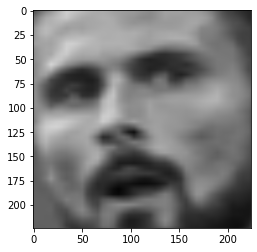

In [ ]:
with open(r"giroud.jpg", 'rb') as f:
    image_bytes = f.read()
image = Image.open(io.BytesIO(image_bytes)).resize((256, 256))
face = mtcnn(image)
face = transform_image(face)
face.shape
# print(face.shape)
imshow(face)
# plt.axis('off');


# img = transforms.ToPILImage(face)
# type(img)


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5,])
    std = np.array([0.5,])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
s = time.time()
frames = []
for i in range(20):
  path = f'test/image{i}.jpg'
  frame = Image.open(path)
  frame = frame.resize((256, 256))
  frames.append(frame)
faces = mtcnn(frames)

t = (time.time() - s)/20

print(t)

0.014469802379608154


/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/utils/detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  boxes = np.array(boxes)
/usr/local/lib/python3.7/dist-packages/facenet_pytorch/models/mtcnn.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndar

# dlib

## HOG-based

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 54kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=a38b0403cbc1dfa3aba3e9f9e4c2ce9fb1c5cdfe4cefa65c4e64839355ab64a2
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition

RuntimeError: ignored

In [ ]:
s = time.time()

for i in range(20):
  path = f'test/image{i}.jpg'
  image = face_recognition.load_image_file(path)
  face_locations = face_recognition.face_locations(image)

t = (time.time() - s)/20

print(t)

0.19837484359741211


## CNN based


In [ ]:
# import required packages
import cv2
import dlib
import argparse
import time


In [ ]:
!wget http://arunponnusamy.com/files/mmod_human_face_detector.dat

--2021-04-23 14:51:17--  http://arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving arunponnusamy.com (arunponnusamy.com)... 185.199.109.153, 185.199.110.153, 185.199.108.153, ...
Connecting to arunponnusamy.com (arunponnusamy.com)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.arunponnusamy.com/files/mmod_human_face_detector.dat [following]
--2021-04-23 14:51:17--  https://www.arunponnusamy.com/files/mmod_human_face_detector.dat
Resolving www.arunponnusamy.com (www.arunponnusamy.com)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to www.arunponnusamy.com (www.arunponnusamy.com)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729940 (713K) [application/octet-stream]
Saving to: ‘mmod_human_face_detector.dat’

mmod_human_face_det 100%[===================>] 712.83K  --.-KB/s    in 0.01s   

2021-04-23 14:51:18 (56.1 MB/s) - ‘mmod_human_face_dete

In [ ]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

s = time.time()

for i in range(20):
  path = f'test/image{i}.jpg'
  image = cv2.imread(path)
  face = cnn_face_detector(image,1)


t = (time.time() - s)/20

print(t)

0.09252258539199829


# cvlib

In [ ]:
!pip install cvlib

     |████████████████████████████████| 10.1MB 4.5MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-cp37-none-any.whl size=10044621 sha256=5cec7eee58dfc2ed07ce04e8f18a587667333a234c6b582235cb58735b15fe51
  Stored in directory: /root/.cache/pip/wheels/5e/a4/99/8dfcae03a6f93bb4084650d0b642ef5a472429928fb95ffd01
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12076 sha256=ae17e0a1f2bea5f7ef0888d1137593429dc218a44d3086b5fd6e52755becdd0e
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


In [ ]:
import cvlib as cv

In [ ]:
s = time.time()

for i in range(20):
  path = f'test/image{i}.jpg'
  image = np.array(Image.open(path))
  faces, confidences = cv.detect_face(image)

t = (time.time() - s)/20

print(t)

0.10509681701660156
